<a href="https://colab.research.google.com/github/safdavis/Capstone1_DS201/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Understanding the Data

### When was the data acquired?


#### The time range of the dataset is May 5th, 2014 through July 9th, 2014. As for when it was collected we can assume that it was after July 9th, 2014 since that is the last date included in the dataset. Or we can assume that it was collected on a rolling basis between May 5th, 2014 and July 9th, 2014.

### Where was the Data acquired?

#### The geographical location covered in the data set is a variety of different cities in Washington.

### How was the data acquired?

#### As for how the data was collected, it does not give you an exact data on kaggle but you can assume that the data was collected from MLS, also known as Multiple Listing Service, it's a system used by real estate agents and brokers to share information about properties that are for sale.

### What are the attributes of this dataset?

####Description of each column in dataset:

Date: The date when the property was sold. This feature helps in understanding
the temporal trends in property prices.

Price:The sale price of the property in USD. This is the target variable we aim
to predict.

Bedrooms:The number of bedrooms in the property. Generally, properties with
more bedrooms tend to have higher prices.

Bathrooms: The number of bathrooms in the property. Similar to bedrooms,
more bathrooms can increase a property’s value.

Sqft Living: The size of the living area in square feet. Larger living areas are
typically associated with higher property values.

Sqft Lot:The size of the lot in square feet. Larger lots may increase a property’s
desirability and value.

Floors: The number of floors in the property. Properties with multiple floors may
offer more living space and appeal.

Waterfront: A binary indicator (1 if the property has a waterfront view, 0 other-
wise). Properties with waterfront views are often valued higher.

View: An index from 0 to 4 indicating the quality of the property’s view. Better
views are likely to enhance a property’s value.

Condition: An index from 1 to 5 rating the condition of the property. Properties
in better condition are typically worth more.

Sqft Above: The square footage of the property above the basement. This can
help isolate the value contribution of above-ground space.

Sqft Basement: The square footage of the basement. Basements may add value
depending on their usability.

Yr Built: The year the property was built. Older properties may have historical
value, while newer ones may offer modern amenities.

Yr Renovated: The year the property was last renovated. Recent renovations can
increase a property’s appeal and value.

Street: The street address of the property. This feature can be used to analyze
location-specific price trends.

City: The city where the property is located. Different cities have distinct market
dynamics.

Statezip: The state and zip code of the property. This feature provides regional
context for the property.

Country: The country where the property is located. While this dataset focuses
on properties in Australia, this feature is included for completeness.


### What type of data do these attributes contain?

Date: Ordinal

Price: Numerical (continuous)

Bedrooms: Numerical (discrete)

Bathrooms: Numerical (discrete)

Sqft_Living: Numerical (continuous)

Sqft_Lot: Numerical (continuous)

Floors: Numerical (discrete)

Waterfront: Categorical (binary: 1 = Yes, 0 = No)

View: Ordinal (numerical scale for view quality)

Condition: Ordinal (numerical scale for condition)

Sqft_Above: Numerical (continuous)

Sqft_Basement: Numerical (continuous)

Yr_Built: Numerical (discrete)

Yr_Renovated: Numerical (discrete, or could be categorical if not renovated)

Street: Categorical (nominal)

City: Categorical (nominal)

Statezip: Categorical (nominal)

Country: Categorical (nominal)


#2. Data Summary & Initial Insights

This is to just download the dataset from Kaggle

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fratzcan/usa-house-prices")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1


This loads the dataset into google colab and prints the first few rows

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming you've already downloaded and unzipped the file)
data = pd.read_csv('/root/.cache/kagglehub/datasets/fratzcan/usa-house-prices/versions/1/USA Housing Dataset.csv')

# Display the first few rows of the dataset to understand the structure
data.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


This shows the summary statistics for each of the attributes included in the dataset

In [ ]:
# 1. Summary Statistics

# Get summary statistics for numerical columns
summary_statistics = data.describe()


# Display summary statistics
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.140000e+03  4140.000000  4140.000000   4140.000000  4.140000e+03   
mean   5.530629e+05     3.400483     2.163043   2143.638889  1.469764e+04   
std    5.836865e+05     0.903939     0.784733    957.481621  3.587684e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.200000e+05     3.000000     1.750000   1470.000000  5.000000e+03   
50%    4.600000e+05     3.000000     2.250000   1980.000000  7.676000e+03   
75%    6.591250e+05     4.000000     2.500000   2620.000000  1.100000e+04   
max    2.659000e+07     8.000000     6.750000  10040.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4140.000000  4140.000000  4140.000000  4140.000000  4140.000000   
mean      1.514130     0.007488     0.246618     3.452415  1831.351449   
std       0.534941     0.086219     0.790619     0.678533   861.

Calculation of individual statistics and checking for missing values

In [ ]:

# You can also calculate individual statistics like mean, median, mode for specific columns:
mean_price = data['price'].mean()
median_price = data['price'].median()
mode_price = data['price'].mode()[0]
std_dev_price = data['price'].std()
price_range = data['price'].max() - data['price'].min()

print(f"\nPrice - Mean: {mean_price}, Median: {median_price}, Mode: {mode_price}, Std Dev: {std_dev_price}, Range: {price_range}")

# 2. Identify Missing (NA) Values

# Check for missing values in each column
missing_values = data.isnull().sum()

print("\nMissing Values per Column:")
print(missing_values)

# For handling missing values, let's show the columns that have missing data
columns_with_missing = missing_values[missing_values > 0]

print("\nColumns with Missing Values:")
print(columns_with_missing)


Price - Mean: 553062.8772890784, Median: 460000.0, Mode: 0.0, Std Dev: 583686.452244623, Range: 26590000.0

Missing Values per Column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Columns with Missing Values:
Series([], dtype: int64)


In [ ]:

# Strategy for handling missing values:
# 1. Numerical columns: We can impute missing values with the mean or median.
# 2. Categorical columns: We can impute missing values with the mode (most frequent value).
# Below is an example for filling missing values:

# Filling missing 'Price' with the median and 'Bedrooms' with the mode
data['price'] = data['price'].fillna(data['price'].median())
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].mode()[0])

# Recheck if there are still missing values
missing_values_after = data.isnull().sum()
print("\nMissing Values After Handling:")
print(missing_values_after)


Missing Values After Handling:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


Visualizations of distribution, box plot, and scatterplots

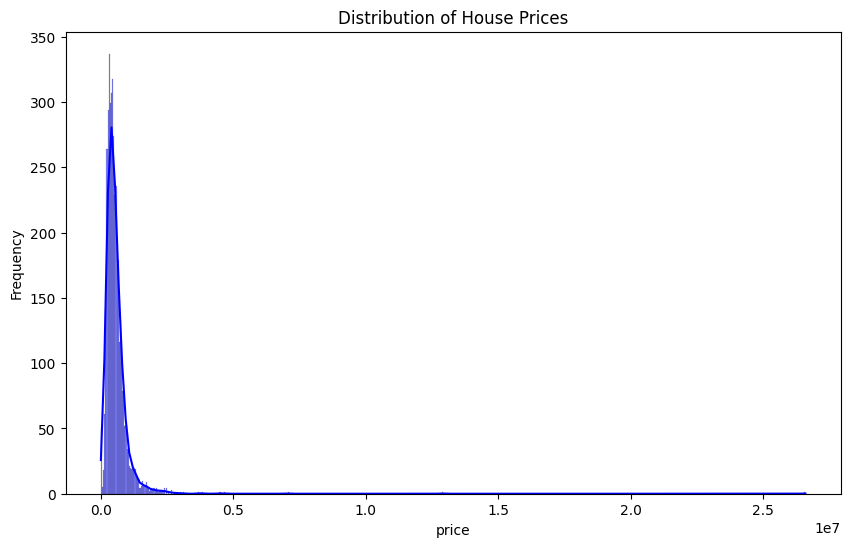

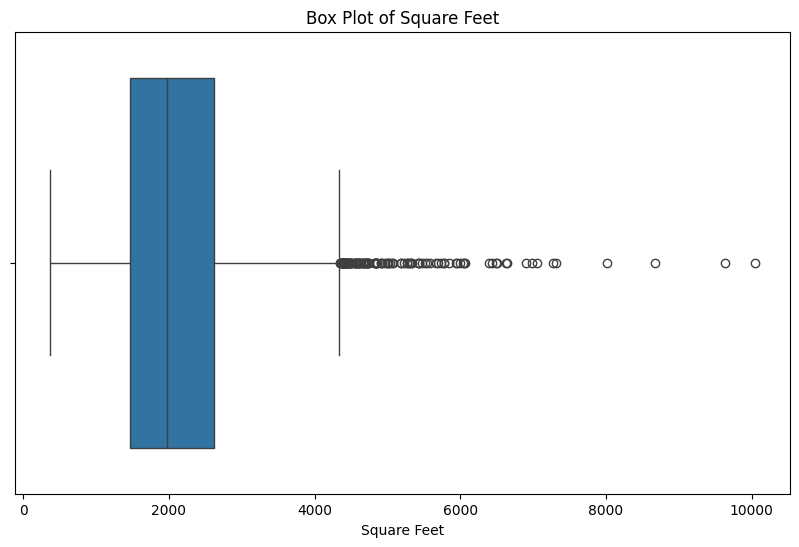

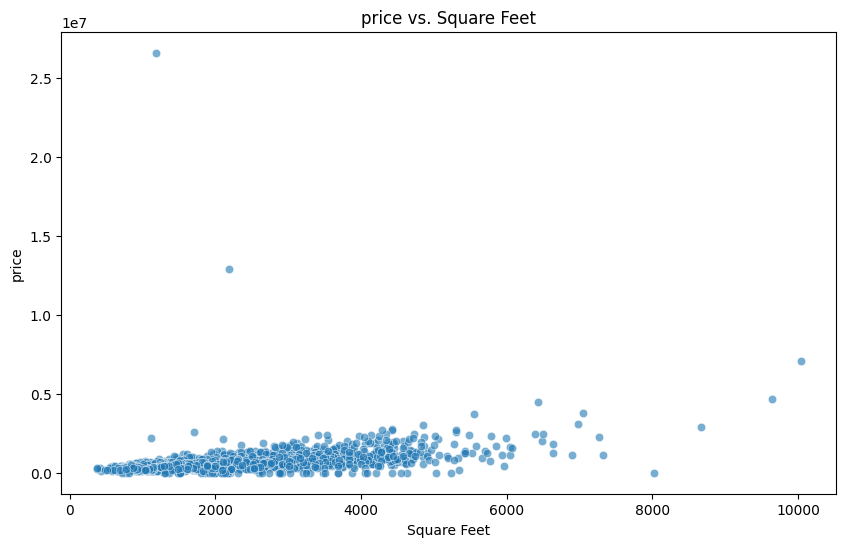

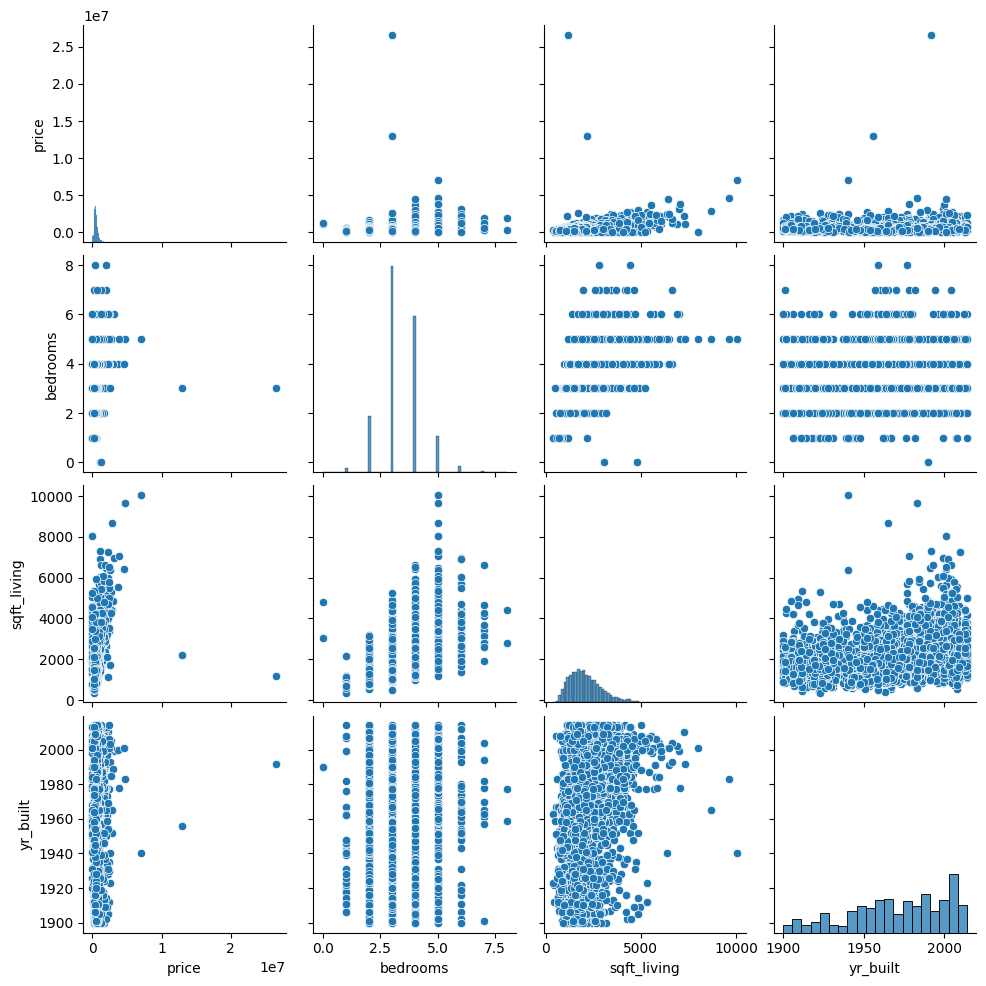

In [ ]:
# 3. Visualizations

# 1. Histogram for Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

# 2. Box Plot for Square Feet (helps identify outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sqft_living'])
plt.title('Box Plot of Square Feet')
plt.xlabel('Square Feet')
plt.show()

# 3. Scatter Plot for Price vs. Square Feet
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['sqft_living'], y=data['price'], alpha=0.6)
plt.title('price vs. Square Feet')
plt.xlabel('Square Feet')
plt.ylabel('price')
plt.show()

# 4. Pairplot for multiple variables (optional, visualizes relationships between variables)
sns.pairplot(data[['price', 'bedrooms', 'sqft_living', 'yr_built']])
plt.show()


# 3. Expanding Your Investment Knowledge

###What other data sources could help inform your investment strategy?
- Zillow Housing Data
-    Zillow helps as a data source because use it can be used alongside this dataset to track market trends, forecast ROI, and identify appreciating areas.

Link: https://www.zillow.com/research/data/